Na dnešní lekci si do virtuálního prostředí nainstalujte následující balíčky:

    notebook numpy scipy matplotlib pillow

Můžete použít prostředí z minula.

(Já tady použiju `-q`, abych skryl dlouhý výstup, a `echo` abych ověřil že se to povedlo; vy můžete instalovat standardně.)

In [1]:
! python -m pip -q install notebook numpy scipy matplotlib pillow
! echo $?

0


Na Windows se může se stát, že nepůjde nainstalovat `scipy`. V takovém případě máte tyto možnosti:

* Nainstalujte ostatní knihovny, Scipy ignorujte. Příslušnou ukázku si nebudete moci projít, ale Scipy nebude potřeba pro domácí úkoly
* Vytvořte nové prostředí, a numpy i scipy nainstalujte z `http://www.lfd.uci.edu/~gohlke/pythonlibs/`. Pozor, je odtud potřeba nainstalovat *obě* – tamější Scipy je nekompatibilní s „oficiálním“ Numpy.
* (časově náročnější) – Nainstalujte Microsoft Visual C++ 2015 (odkaz ne výše uvedené stránce) a zkuste znovu. Googlete. Chcete-li aby to další uživatelé Windows měli jednodušší, informujte vyučující jak to zprovoznit (nejlépe Pull Requestem).

---

# NumPy

NumPy je základní knihovna pro vědce a analytiky, kteří pracují s Pythonem. Definuje typ pro *n*-rozměrné homogenní pole (nejčastěji čísel), a API pro práci s takovým polem.

Téměř všechny knihovny, kde se objevují větší matice či tabulky, jsou buď postavené na NumPy, nebo podporují `numpy.array`: od `pandas` a `matplotlib`, které jsme si ukázali minule, přes `scipy`, kde najdete základní algoritmy pro interpolaci, integraci aj., astrofyzikální `astropy`, `librosa` pro analýzu hudby, až po integraci v knihovnách jako `Pillow` nebo `Tensorflow`. 

Knihovna NumPy, a její předchůdci Numeric a Numarray, ovlivňovaly při svém vývoji samotný Python: syntaxe pro indexování, podpora jakýchkoli výsledků u porovnávacích operátorů, literál `...` (Ellipsis) a operátor `@` byly přidány hlavně pro NumPy.

Jak s polem pracovat? Nejprve si ho vytvoříme, nejlépe ze seznamu čísel:

In [2]:
import numpy
array = numpy.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

Každé pole má dvě základní, neměnné vlastnosti: *tvar* (`shape`), neboli velikost, a *datový typ* (`dtype`).

In [3]:
array.shape

(3, 3)

In [4]:
array.dtype

dtype('int64')

Tvar je *n*-tice, kde *n* je počet dimenzí pole; `shape=(3, 3) dtype='int64'` znamená pole 3×3 celých čísel.
Dimenzí může být libovolně mnoho, např. trojrozměrnou matici můžeme vytvořit z trojnásobně vnořených seznamů, a NumPy ji „rozumně” vypíše:

In [5]:
cube = numpy.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print(cube.shape)
cube

(2, 2, 2)


array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

## Indexování

NumPy pole jde indexovat způsoby, které už známe, ať už ze samotného Pythonu nebo z Pandas:

In [6]:
array

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [7]:
array[0]

array([1, 2, 3])

In [8]:
array[0, 1]

2

In [9]:
array[:, 2]

array([3, 6, 9])

In [10]:
array[[2, 1, 1]]

array([[7, 8, 9],
       [4, 5, 6],
       [4, 5, 6]])

In [11]:
array[(0, 1, 2), (1, 2, 0)]  # Příslušné prvky: (0, 1), (1, 2), (2, 0)

array([2, 6, 7])

In [12]:
array[array > 4]

array([5, 6, 7, 8, 9])

Trochu specifické je indexování vícerozměrných polí. U nich se často využije „kompletní interval“ (`:`):

In [13]:
cube

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [14]:
cube[0, :, :]  # První „vrstva“ - to samé jako cube[0]

array([[1, 2],
       [3, 4]])

In [15]:
cube[:, 0, :]  # První řádky - to samé jako cube[:, 0]

array([[1, 2],
       [5, 6]])

In [16]:
cube[:, :, 0]  # První sloupce

array([[1, 3],
       [5, 7]])

Má-li pole hodně rozměrů, je psaní spousty `:,` zdlouhavé a nepřehledné. Existuje proto speciální hodnota `...` (`Ellipsis`), která doplní tolik „kompletních intervalů“ (`:`), aby souhlasil počet dimenzí:

In [17]:
cube[..., 0]  # První sloupce – ekvivalent [:, :, 3]

array([[1, 3],
       [5, 7]])

## Základní operace

Jako u Pandas Dataframe, aritmetické a porovnávací operace se skalárními hodnotami (např. čísly) fungují po prvcích.

In [18]:
array - 1

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [19]:
array > 5

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]], dtype=bool)

Operace s jinými poli pracují s odpovídajícími prvky. Sekvence (jako seznamy) jsou před operací převedeny na pole.

In [20]:
array + array

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [21]:
array * numpy.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

array([[0, 2, 0],
       [4, 0, 6],
       [0, 8, 0]])

In [22]:
array * [[0, 1, 0], [1, 0, 1], [0, 1, 0]]

array([[0, 2, 0],
       [4, 0, 6],
       [0, 8, 0]])

## Broadcasting a změny

Nemá-li sekvence, se kterou pracujeme, dost dimenzí, poslední dimenze se „rozšíří“, jako bychom pracovali v každém sloupci se skalární hodnotou. Tomuto „rozšiřování” se obecně říká *broadcasting*.

In [23]:
array * [0, 1, 2]   # vynásobí 1. sloupec nulou, 2. jedničkou, 3. dvojkou

array([[ 0,  2,  6],
       [ 0,  5, 12],
       [ 0,  8, 18]])

Podobné rozšiřování nastane, má-li některá dimenze velikost 1:

In [24]:
array * [[0], [1], [2]]  # vynásobí 1. *řádek* nulou, atd.

array([[ 0,  0,  0],
       [ 4,  5,  6],
       [14, 16, 18]])

Jednotlivé hodnoty v poli lze měnit:

In [25]:
array[0, 0] = 123
array

array([[123,   2,   3],
       [  4,   5,   6],
       [  7,   8,   9]])

... a i na měnění se vztahuje *broadcasting*:

In [26]:
array[0] = 123
array

array([[123, 123, 123],
       [  4,   5,   6],
       [  7,   8,   9]])

In [27]:
array[:] = 123
array

array([[123, 123, 123],
       [123, 123, 123],
       [123, 123, 123]])

In [28]:
array[(1, 2, 0), (0, 2, 1)] = 0
array

array([[123,   0, 123],
       [  0, 123, 123],
       [123, 123,   0]])

Další způsob, jak pole měnit, je rozšířeným přiřazením.

In [29]:
array *= 2
array

array([[246,   0, 246],
       [  0, 246, 246],
       [246, 246,   0]])

In [30]:
array //= 2  # Jen /= na celá čísla nefunguje – musel by se změnit typ pole!
array

array([[123,   0, 123],
       [  0, 123, 123],
       [123, 123,   0]])

## Tvoření matic, část 2

Časté druhy matic dají vytvořit pomocí pomocných funkcí. Výsledky se dají použít přímo, nebo naplnit vypočítanými daty:

In [31]:
numpy.zeros((4, 4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [32]:
numpy.ones((4, 4))

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [33]:
numpy.full((4, 4), 12.34)

array([[ 12.34,  12.34,  12.34,  12.34],
       [ 12.34,  12.34,  12.34,  12.34],
       [ 12.34,  12.34,  12.34,  12.34],
       [ 12.34,  12.34,  12.34,  12.34]])

In [34]:
numpy.eye(4)  # Jednotková matice (je čtvercová – n×n)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [35]:
numpy.diag([1, 2, 3, 4])  # Diagonální matice

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [36]:
int_zeros = numpy.zeros((4, 4), dtype=int)
print(int_zeros.dtype)
int_zeros

int64


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

Pro zrychlení lze použít funkci, která neinicializuje paměť – dostaneme nějaké nepředvídatelné hodnoty (chování známé z C):

In [37]:
trash = numpy.empty((30, 30, 30))
trash.shape

(30, 30, 30)

Další funkce tvoří jednorozměrné matice. Základní je `arange`, která bere stejné argumenty jako `range` v Pythonu:

In [38]:
numpy.arange(50)  # Celočíselné – argumenty jako range() v Pythonu

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

Navíc umí pracovat s reálnými čísly (`float`):

In [39]:
numpy.arange(10.0)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

Pozor ale na to, že reálná čísla jsou *nepřesná*! `arange` k začátku sekvence postupněpostupně přičítá „krok”, takže chyba narůstá celkem rychle:

In [40]:
numpy.arange(0.0, 50.0, 0.3)[-1]

49.799999999999997

V krajních případech takto dokonce můžeme dostat pole jiné *velikosti*, než jsme zamýšleli. Proto `arange` používejte jen pro celá čísla; pro reálná je tu `linspace`, která bere začátek a konec intervalu, plus počet prvků:

In [41]:
numpy.linspace(0, 50, num=11)  # vždy 11 prvků

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.])

## Reshape

Ačkoli indexování polí v NumPy je dost mocné, v paměti jsou jednotlivé hodnoty reprezentovány jako (metadata a) jednorozměrné pole, známé z jazyka C (ačkoli samotné rozmístění prvků může být jiné než po řádcích, jak jsme zvyklí u C).

Je jednoduché změnit tvar pole, nezmění-li se tím celkový počet prvků:

In [42]:
array = numpy.arange(12)
array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [43]:
reshaped = array.reshape((3, 4))
reshaped

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Pozor na to, že `reshape` sice vrací nový objekt, ale je to jen nový *pohled* na existující data. Změny v pohledu se projeví i v původním poli:

In [44]:
reshaped[2, 2] = -99
reshaped

array([[  0,   1,   2,   3],
       [  4,   5,   6,   7],
       [  8,   9, -99,  11]])

In [45]:
array

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9, -99,  11])

Podobně tvoří pohledy i jednoduché indexování:

In [46]:
a_slice = array[2:4]
a_slice[:] = -99, -99

array

array([  0,   1, -99, -99,   4,   5,   6,   7,   8,   9, -99,  11])

Potřebujete-li kopii dat, použijte metodu `copy`:

In [47]:
array.reshape((3, 4)).copy()

array([[  0,   1, -99, -99],
       [  4,   5,   6,   7],
       [  8,   9, -99,  11]])

Podobně jako `reshape` funguje transpozice, což je tak častá operace, že má jednopísmennou zkratku – atribut `T`. (Tohle hodně napomáhá tomu, že maticové výpočty v NumPy se podobají odpovídajícím matematickým vzorcům.)

In [48]:
reshaped.T

array([[  0,   4,   8],
       [  1,   5,   9],
       [-99,   6, -99],
       [-99,   7,  11]])

Až budete NumPy zkoušet, doporučuji se u nových funkcí najít, zda tvoří nová pole, vracejí pohled, nebo modifikují původní pole. U některých funkcí najdete pojmenovaný argument `inplace`, případně `out`, kterým se dá „naplnit“ jiné, existující pole.

## Datové typy

Jak už bylo naznačeno, matice v NumPy mají určené datové typy. Ty jdou nastavit ve většině funkcí, které matice tvoří, argumentem `dtype`:

In [49]:
numpy.zeros(4, dtype=int)

array([0, 0, 0, 0])

In [50]:
numpy.zeros(4, dtype=float)

array([ 0.,  0.,  0.,  0.])

In [51]:
numpy.zeros(4, dtype=bool)

array([False, False, False, False], dtype=bool)

Nejobecnější typ je `object` (jehož použitím ale přicházíme o většinu výhod NumPy).

In [52]:
numpy.zeros(4, dtype=object)

array([0, 0, 0, 0], dtype=object)

Kromě Pythoních typů bere `dtype` i řetězcové specifikace typu:

In [53]:
numpy.zeros(4, dtype='int16')

array([0, 0, 0, 0], dtype=int16)

Znáte-li modul [`array`](https://docs.python.org/3/library/array.html) ze standardní knihovny, můžete jeho specifikaci použít i tady:

In [54]:
numpy.zeros(4, dtype='<I')

array([0, 0, 0, 0], dtype=uint32)

In [55]:
numpy.zeros(4, dtype='<Q')

array([0, 0, 0, 0], dtype=uint64)

In [56]:
numpy.zeros(4, dtype='f')

array([ 0.,  0.,  0.,  0.], dtype=float32)

Navíc `dtype` umí řetězcové a *bytestring* typy (které se vám můžou hodit v úloze). Tyto mají danou maximální velikost, a nesmí obsahovat `\0` (resp. znakem `'\0'` jsou ukončeny):

In [57]:
numpy.full(4, 'abcdef', dtype=('U', 10))  # Unicode

array(['abcdef', 'abcdef', 'abcdef', 'abcdef'], 
      dtype='<U10')

In [58]:
numpy.full(4, 'abcdef', dtype=('a', 3))  # "aSCII"

array([b'abc', b'abc', b'abc', b'abc'], 
      dtype='|S3')

Typy v NumPy můžou být poměrně složité; např. existují i složené datové typy (`records`). Ty nebudeme používat, ale je dobré o nich aspoň tušit:

In [59]:
record_type = numpy.dtype([('a', int), ('b', float), ('c', ('U', 3))])
numpy.array([(1, 2, 'abc')] * 4, record_type)

array([(1, 2.0, 'abc'), (1, 2.0, 'abc'), (1, 2.0, 'abc'), (1, 2.0, 'abc')], 
      dtype=[('a', '<i8'), ('b', '<f8'), ('c', '<U3')])

## Maticové násobení

Kromě základních aritmetických operací se u vícerozměrných polí často setkáme s maticovám násobením. Předpokládám, že jako bakaláři jste se s ním už setkali a tušíte co dělá – jestli ne, tuto sekci ignorujte.

V Pythonu 3.5 byl na [výzvu vědecké komunity](http://legacy.python.org/dev/peps/pep-0465/) do jazyka přidán operátor `@` (mATrix multiplication), který je vyhrazen pro maticové násobení. V samotném Pythonu ani ve standardní knihovně není typ, který ho podporuje, ale matice v NumPy tuto operaci samozřejmě umí.

In [60]:
array1 = numpy.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
array2 = numpy.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]])
array1 @ array2

array([[ 1,  4,  9],
       [ 4, 10, 18],
       [ 7, 16, 27]])

Alternativou je metoda nebo funkce `dot`. Ve sterších verzích Pythonu je potřeba používat ty.

In [61]:
from numpy import dot
dot(array1, array2)

array([[ 1,  4,  9],
       [ 4, 10, 18],
       [ 7, 16, 27]])

In [62]:
array1.dot(array2)

array([[ 1,  4,  9],
       [ 4, 10, 18],
       [ 7, 16, 27]])

Důvod přidání operátoru `@` byl prostý – zjednodušení zápisu maticových operací. Jako příklad uvedený v návrhu je uveden tento vzorec pro testování hypotéz v lineárním regresním modelu:

$ S=(H\beta-r)^T(HVH^T)^{-1} (H\beta-r) $

V Numpy se dá přepsat jako:

    from numpy import dot
    from numpy.linalg import inv, solve

Pomocí funkce `dot`:

    S = dot((dot(H, beta) - r).T,
           dot(inv(dot(dot(H, V), H.T)), dot(H, beta) - r))

Pomocí metoody `dot`:

    S = (H.dot(beta) - r).T.dot(inv(H.dot(V).dot(H.T))).dot(H.dot(beta) - r)


Pomocí operátoru `@`:

    S = (H @ beta - r).T @ inv(H @ V @ H.T) @ (H @ beta - r)

Poslední varianta nápadně připomíná původní vzorec; u prvních dvou se člověk snadno ztratí ve změti závorek.

## Booleovské hodnoty polí

Použijeme-li pole v příkazu *if*, NumPy nám vynadá. Standardní pythoní seznamu je „pravdivý“ pokud obsahuje nějaké prvky, ale u pole, které má fixní velikost, je tahle informace téměř vždy zbytečná.

In [63]:
try:
    if numpy.eye(3):
        pass
except ValueError as e:
    print(e)

The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()


Musíme říct přesně, co chceme.

In [64]:
if numpy.eye(3).any():
    print('Alespoň jeden prvek je nenulový')
if numpy.eye(3).all():
    print('Všechny prvky jsou nenulové')
if numpy.eye(3).size:
    print('Pole obsahuje nějaké prvky')

Alespoň jeden prvek je nenulový
Pole obsahuje nějaké prvky


Existují dvě výjimky, pole s právě jedním prvkem má pravdivostní hodnotu podle daného prvku, a prázdné pole je „nepravdivé“:

In [65]:
print(numpy.ones((1, 1, 1, 1)))
if numpy.ones((1, 1, 1, 1)):
    print('Ano')
if numpy.zeros((1, 1, 1, 1)):
    print('Ne')

[[[[ 1.]]]]
Ano


In [66]:
if numpy.ones((0, 0)):
    print('Ano')

## Další operace

NumPy obsahuje spoustu základních funkcí, které pracují s maticemi; mimo jiné většinu funkcií z Pythoního modulu `math`. Oproti vestavěnému modulu umí funkce z NumPy pracovat s poli – tedy zvládají *broadcasting*.

In [67]:
array = numpy.linspace(0, numpy.pi, num=1000)
array[:10]

array([ 0.        ,  0.00314474,  0.00628947,  0.00943421,  0.01257895,
        0.01572369,  0.01886842,  0.02201316,  0.0251579 ,  0.02830264])

In [68]:
sine = numpy.sin(array)
sine[:10]

array([ 0.        ,  0.00314473,  0.00628943,  0.00943407,  0.01257862,
        0.01572304,  0.0188673 ,  0.02201138,  0.02515525,  0.02829886])

Další operace doporučuji hledat buď v Notebooku přes <kbd>tab</kbd>, nebo v dokumentaci, nebo obecně na Internetu (kde najdete i případné knihovny, které implementují operace, které v NumPy nejsou).

# Příklady použití

Dost teorie. Tahle *n*-rozměrná pole se používají na spoustu zajímavých věcí. Podívejme se na některé příklady.

## Matematika

Jak se používají matice, jistě znáte z matematiky, a cílem tohoto kurzu není vás to naučit. Ukážu ale pár ochutnávek NumPy a Matplotlib, které (a jiné další) jistě dohledáte v příslušných dokumentacích.

In [69]:
from matplotlib import pyplot

%matplotlib inline

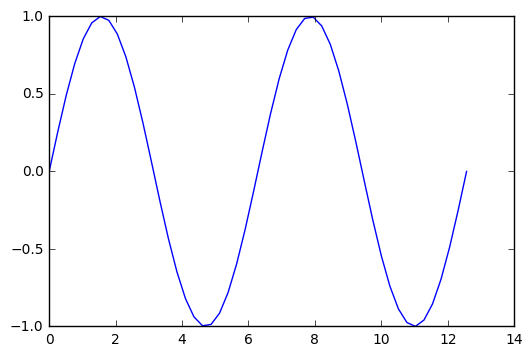

In [70]:
x = numpy.linspace(0, numpy.pi * 4)
y = numpy.sin(x)

pyplot.plot(x, y)

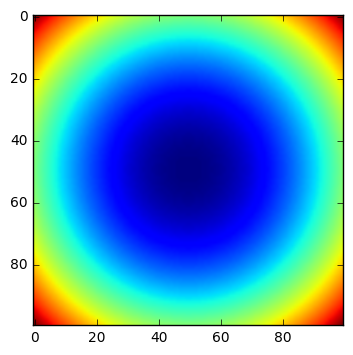

In [71]:
s = numpy.linspace(-10, 10, num=100)
x, y = numpy.meshgrid(s, s)
z = x ** 2 + y ** 2

pyplot.imshow(z)

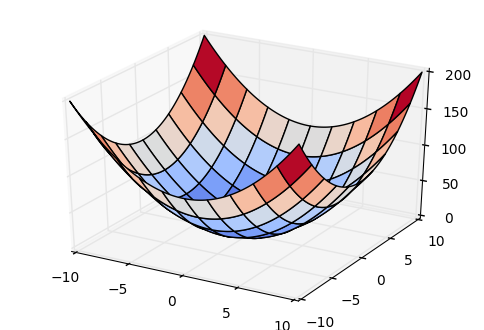

In [72]:
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
axes = fig.gca(projection='3d')

surf = axes.plot_surface(x, y, z, cmap='coolwarm')

## Obrázky

Typický barevný obrázek není nic než matice $m×n×3$ čísel: $m×n$ pixelů na šířku a výšku, a 3 kanály pro červenou, zelenou a modrou barvu.

Knihovna `pillow` (nástupce knihovny PIL, který se stále importuje jako PIL) obsahuje nástroje na práci s obrázky, např. „nakresli čáru“ nebo „převeď na černobílý obrázek“ nebo „načti PNG“. Není postavena přímo na NumPy, ale umí obrázky převádět z a na NumPy pole, pokud máme NumPy nainstalované.

V knihovně `scipy.ndimage` existuje spousta nástrojů na analýzu obrazových dat jako 2D signálů, např. konvoluce nebo Sobelův filtr. Jako celé Scipy je postavená přímo na NumPy.

Nás bude na začátku zajímat funkce `scipy.ndimage.imread`, která pomocí Pillow/PIL načte obrázek jako 3D matici 8-bitových čísel. Já načtu obrázek hada, vy najděte na internetu jakýkoli barevný obrázek a načtěte si ten.

*Použitý obrázek je stažený [z Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Ball_python_lucy.JPG) a je pod licencí [CC-BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.en). Autor je uživatel [Mokele](https://en.wikipedia.org/wiki/User:HCA) na [anglické Wikipedii](https://en.wikipedia.org/wiki/).*

In [73]:
import scipy.ndimage
img = scipy.ndimage.imread('python.jpg', mode='RGB')
img

array([[[172, 173, 165],
        [173, 174, 166],
        [173, 174, 168],
        ..., 
        [172, 171, 167],
        [173, 172, 168],
        [173, 172, 168]],

       [[175, 176, 168],
        [174, 175, 167],
        [172, 173, 167],
        ..., 
        [172, 171, 167],
        [173, 172, 168],
        [174, 173, 169]],

       [[176, 177, 169],
        [174, 175, 167],
        [171, 172, 166],
        ..., 
        [173, 172, 168],
        [173, 172, 168],
        [172, 171, 167]],

       ..., 
       [[209, 211, 206],
        [210, 212, 207],
        [211, 213, 208],
        ..., 
        [202, 203, 197],
        [200, 201, 195],
        [200, 201, 195]],

       [[208, 210, 205],
        [209, 211, 206],
        [209, 211, 206],
        ..., 
        [202, 203, 197],
        [202, 203, 197],
        [203, 204, 198]],

       [[207, 209, 204],
        [209, 211, 206],
        [210, 212, 207],
        ..., 
        [201, 202, 196],
        [201, 202, 196],
        [201, 202,

Pomocí nám už známé knihovny `matplotlib` takovou matici můžeme zobrazit:

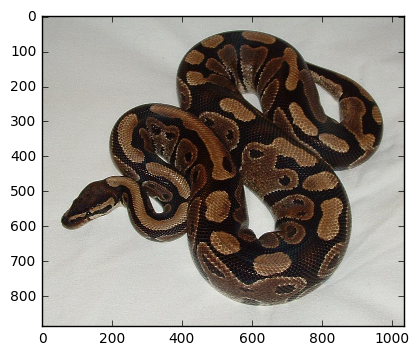

In [74]:
from matplotlib import pyplot

%matplotlib inline

pyplot.imshow(img)

Podívejme se teď na strukturu matice:

In [75]:
img.shape

(887, 1037, 3)

První rozměr jsou řádky (y); můj obrázek je 887 pixelů vysoký. Druhý jsou sloupce (x); tento obrázek má na šířku 1037px.
Třetí rozměr jsou barevné kanály.

Pomocí indexování se můžeme na jednotlivé barevné kanály dostat: je to poslední index, takže řádky a sloupce nahradíme buď dvěma kompletními intervaly (`:, :`) nebo vynechávkou (`...`). Červený kanál tedy bude `[..., 1]`, modrý `[..., -1]`.

Zobrazení chceme černobílé; na to má matplotlib pojmenovaný argument `cmap`. Výchozí způsob obarvování je vhodný spíše pro grafy funkcí.

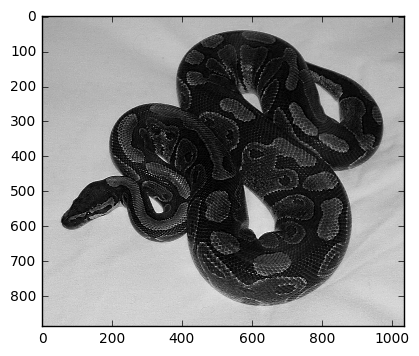

In [76]:
blue_channel = img[..., -1]
pyplot.imshow(blue_channel, cmap='gray')

Zajímavé využití obrázku jako matice je steganografie: ukrytí informace v obrazových datech.

Načteme jiný obrázek stejné velikosti, tentokrát černobílý (s módem `L`). Informace v něm schováme do posledního bitu modrého kanálu.

In [77]:
secret = scipy.ndimage.imread('secret.png', mode='L')

img[..., -1] = (img[..., -1] & 0b11111110) + (secret.astype(bool))

Obrázek vypadá na první pohled stejně...

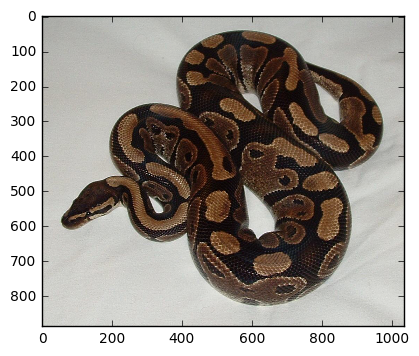

In [78]:
pyplot.imshow(img)

... ale v posledím modrém bitu se skrývá tajná informace.

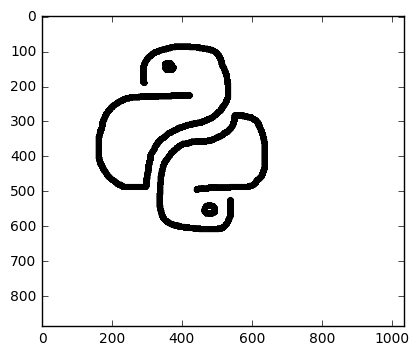

In [79]:
pyplot.imshow(img[..., -1] & 1, cmap='gray')

Výsledek je dobré uložit v bezztrátovém formátu (PNG), aby se informace neztratila:

In [80]:
scipy.misc.imsave('python.png', img)

## Transformační matice

Z počítačové grafiky byste měli znát znáte koncept transformačních matic, tedy (pro 2D) 3×3 matic, kterými můžeme posouvat, otáčet, nebo zvětšovat grafiku, a jejichž efekty se kombinují maticovým násobením.

Stáhnete-li si podpůrné soubory `matrixdemo.py` a `python-logo-template.svg`, můžeme jejich účinek ukázat přímo v Notebooku.

In [81]:
from matrixdemo import MatrixDemo
# Třída MatrixDemo vykreslí logo Pythonu s aplikovanou transformační maticí,
# a pod ním čtverec, na který matice aplikovaná není.
# (Zvídaví se můžou podívat, jak se dělá třída, která se v Notebooku
# vykreslí jako obrázek)

In [82]:
def demo(matrix):
    print(matrix)
    return MatrixDemo(matrix)

[[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


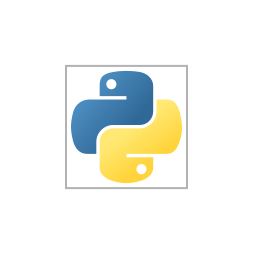

In [83]:
identity = numpy.eye(3)
demo(identity)

[[  1   0 -62]
 [  0   1 -62]
 [  0   0   1]]


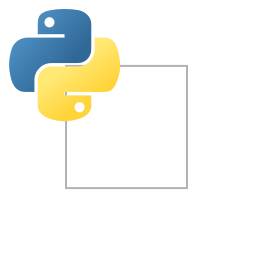

In [84]:
translation = numpy.array([[1, 0, -62],
                   [0, 1, -62],
                   [0, 0, 1]])
demo(translation)

[[ 0.5  0.   0. ]
 [ 0.   1.5  0. ]
 [ 0.   0.   1. ]]


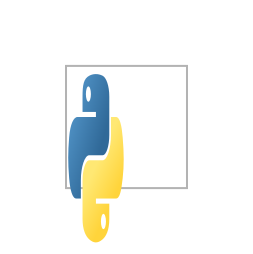

In [85]:
scale = numpy.array([[0.5, 0, 0],
                   [0, 1.5, 0],
                   [0, 0, 1]])
demo(scale)

[[ 1.  -0.5  0. ]
 [ 0.   1.   0. ]
 [ 0.   0.   1. ]]


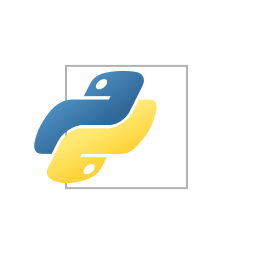

In [86]:
shear = numpy.array([[1, -0.5, 0],
                     [0, 1, 0],
                     [0, 0, 1]])
demo(shear)

[[ 0.92387953 -0.38268343  0.        ]
 [ 0.38268343  0.92387953  0.        ]
 [ 0.          0.          1.        ]]


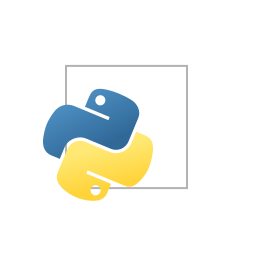

In [87]:
a = numpy.pi / 8
rotation = numpy.array([[numpy.cos(a), -numpy.sin(a), 0],
                   [numpy.sin(a), numpy.cos(a), 0],
                   [0, 0, 1]])
demo(rotation)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]


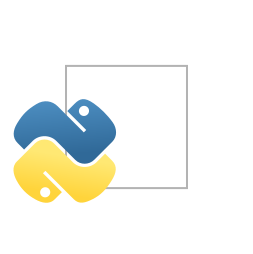

In [88]:
combined = rotation @ rotation
demo(combined)

[[  -0.70710678    0.70710678   62.        ]
 [  -0.70710678   -0.70710678  149.68124087]
 [   0.            0.           -1.        ]]


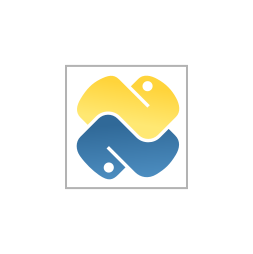

In [89]:
combined = translation @ rotation @ rotation @ -translation
demo(combined)

## Zvuk

In [90]:
import scipy.io.wavfile
framerate, sound = scipy.io.wavfile.read('sample.wav')
print(framerate)
sound

48000


array([[-355, -281],
       [ -80,   -7],
       [-103,   16],
       ..., 
       [  80,  108],
       [ -31,  124],
       [  23,  161]], dtype=int16)

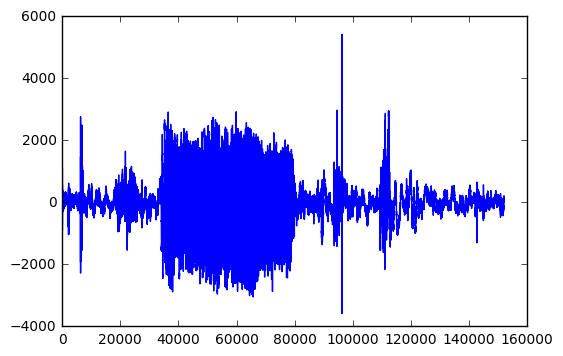

In [91]:
channel = sound[..., 1]
pyplot.plot(channel)

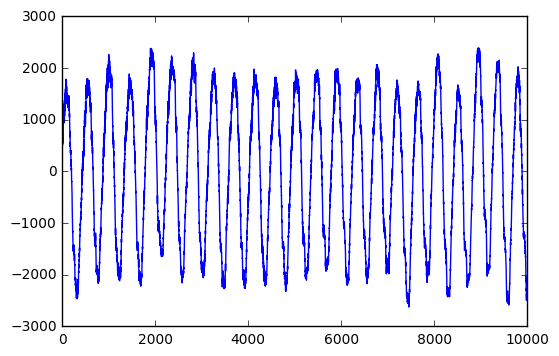

In [92]:
segment = channel[40000:50000]
pyplot.plot(segment)